In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.inception_v3 import preprocess_input 

# models 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from keras.applications import VGG19

In [ ]:
import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

# 이미지 데이터 불러오기

In [ ]:
import os
 
root_dir = '/content/drive/MyDrive/note/Big_Project/3주차/image modeling/train_acc' # 디렉토리
 
img_path_list = []
possible_img_extension = ['.jpg', 'jfif', '.jpeg', '.JPG', '.bmp', '.png'] # 이미지 확장자들
 
for (root, dirs, files) in os.walk(root_dir):
    if len(files) > 0:
        for file_name in files:
            if os.path.splitext(file_name)[1] in possible_img_extension:
                img_path = root + '/' + file_name
                
                # 경로에서 \를 모두 /로 바꿔줘야함
                img_path = img_path.replace('\\', '/') # \는 \\로 나타내야함         
                img_path_list.append(img_path)

In [ ]:
len(img_path_list)

312

In [ ]:
img = load_img(img_path_list[0],target_size=(224,224))
img = np.array(img)
print(img.shape)
# (224, 224, 3)

(224, 224, 3)


## 이미지 데이터 resize

In [ ]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)
# (1, 224, 224, 3)

(1, 224, 224, 3)


# InceptionV3 모델 불러오기

In [ ]:
# load the model first and pass as an argument
model = InceptionV3()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

96112376/96112376 [==============================] - 1s 0us/step


## feature extract를 위한 함수

In [ ]:
# InceptionV3
def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(299,299))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,299,299,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [ ]:
# Input 0 of layer "model_1" is incompatible with the layer: expected shape=(None, 299, 299, 3), found shape=(None, 224, 224, 3)

## feature extract 진행

In [ ]:
data = {}


# lop through each image in the dataset
for img in img_path_list:
    feat = extract_features(img, model)
    data[img] = feat


filenames = np.array(list(data.keys()))
feat = np.array(list(data.values()))
feat.shape
# (403, 1, 2048)

1/1 [==============================] - 0s 266ms/step


(312, 1, 2048)

In [ ]:

# inception v3, xception : (-1, 2048)
feat = feat.reshape(-1, 2048)
feat.shape

unique_labels = 3

In [ ]:
feat.shape

(312, 2048)

## 추출된 feature을 기준으로 kmeans 클러스터링 진행

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=np.random.RandomState(seed=1)) # 그룹 고정 
kmeans.fit(feat)

KMeans(n_clusters=3, random_state=RandomState(MT19937) at 0x7F977D819040)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2,
       0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,

## 모델저장

In [ ]:
import joblib 
joblib.dump(kmeans, '/content/drive/MyDrive/note/Big_Project/3주차/image modeling/model/kmeans.pkl')

['/content/drive/MyDrive/note/Big_Project/3주차/image modeling/model/kmeans.pkl']

## 모델 불러오기

In [ ]:
import joblib 
kmeans_model = joblib.load('/content/drive/MyDrive/note/Big_Project/3주차/image modeling/model/kmeans.pkl')

## 나눠진 label별로 그룹핑

In [ ]:
groups = {}
for file, cluster in zip(filenames,kmeans.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

In [ ]:
print(len(groups[0]))
print(len(groups[1]))
print(len(groups[2]))
# 76, 162, 163 (inception v3)
# 213, 118, 70 (xception)
# 151, 73, 177(vgg19)
# 133, 68, 111

133
68
111


In [ ]:
import cv2
import matplotlib.pyplot as plt

## 나눠진 그룹을 시각화 해주는 함수

In [ ]:
def view_cluster(cluster):
    plt.figure(figsize = (25,25));
    # gets the list of filenames for a cluster
    files = groups[cluster]
    # only allow up to 30 images to be shown at a time
    #if len(files) > 30:
        #print(f"Clipping cluster size from {len(files)} to 30")
        #files = files[:29]
    # plot each image in the cluster
    print(f"Clipping cluster size from {len(files)}")
    for index, file in enumerate(files):
      if len(files) <= 100:
        plt.subplot(len(files)//5, len(files)//5,index+1)
      else:
        plt.subplot(len(files)//10, len(files)//10,index+1)
      img = load_img(file)
      img = np.array(img)
      plt.imshow(img)
      plt.axis('off')

## INCEPTION V3 나눠진 결과

Clipping cluster size from 76


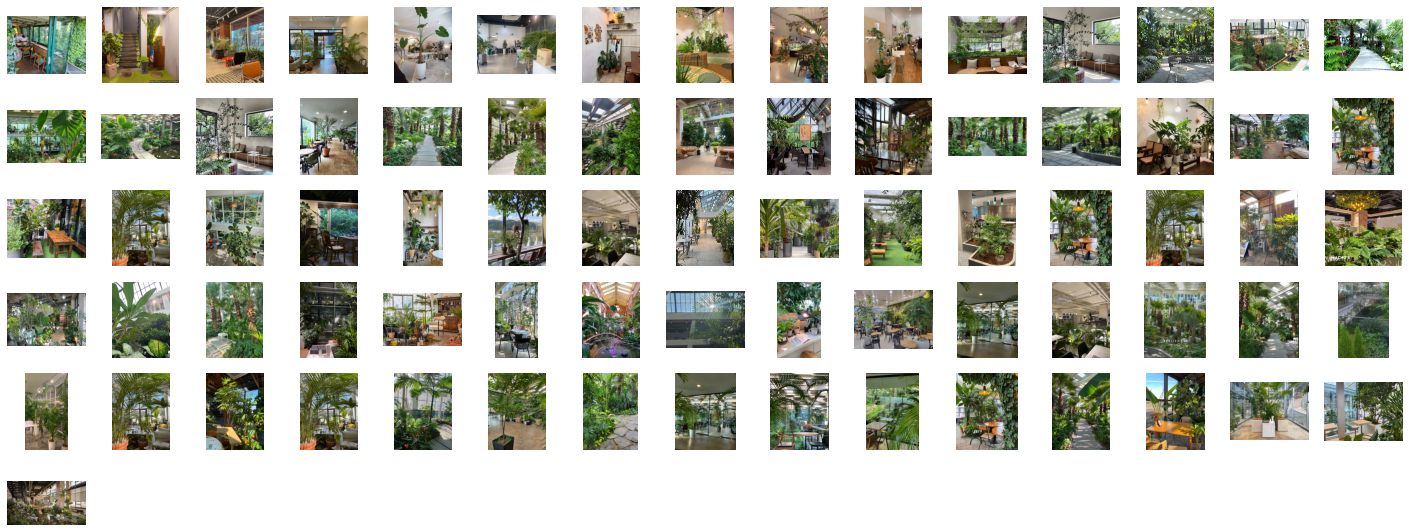

In [ ]:
view_cluster(0)

In [ ]:
view_cluster(1)

Output hidden; open in https://colab.research.google.com to view.

Clipping cluster size from 163


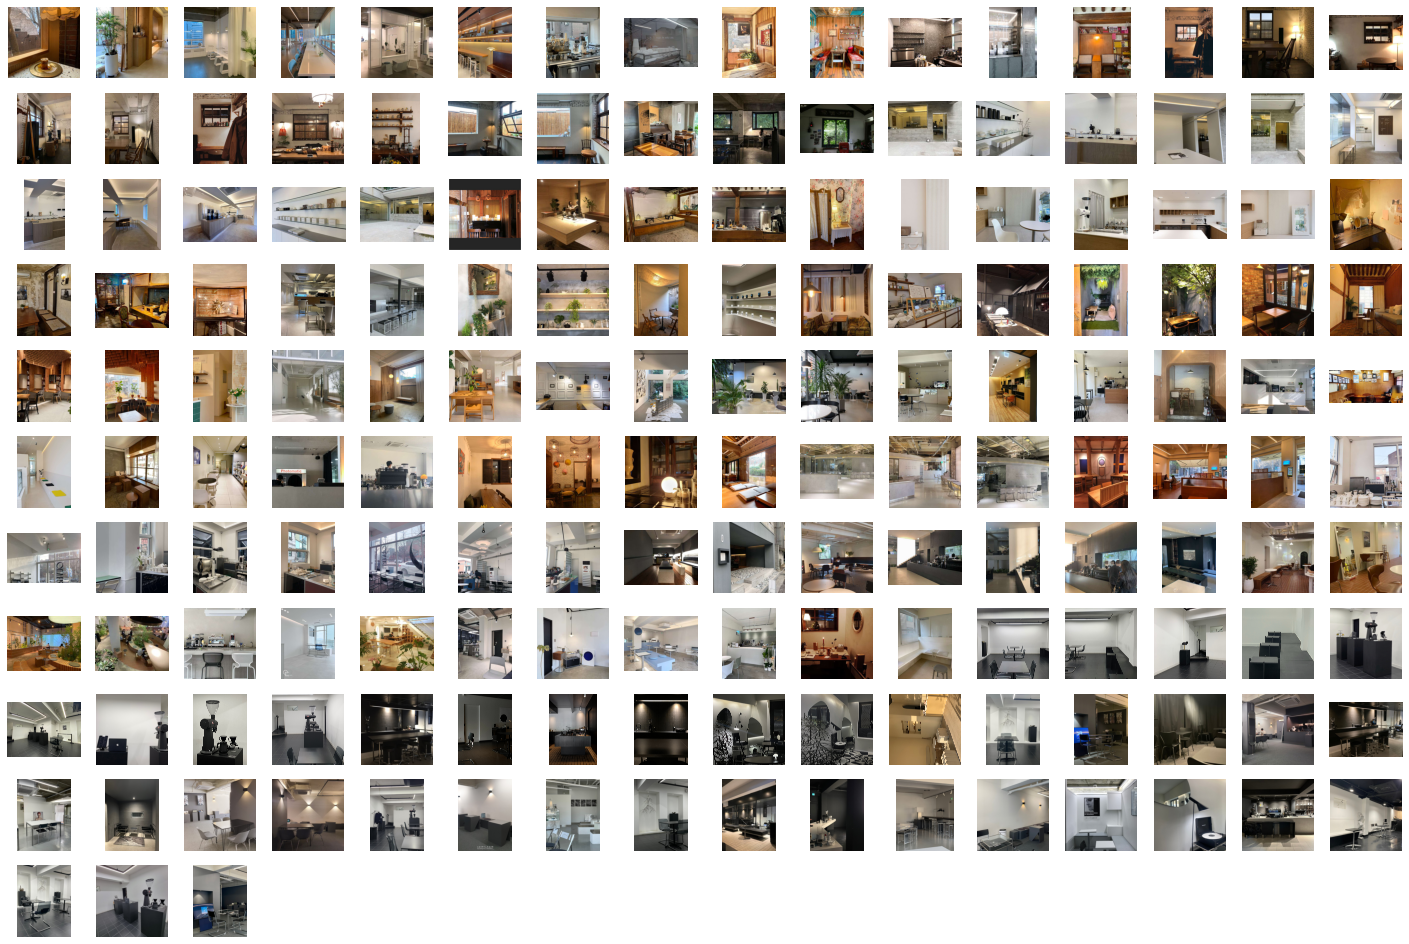

In [ ]:
view_cluster(2)